Importing Required Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mount Google Drive

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Your Dataset from Drive

In [31]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


 Extracting Features (X)

In [32]:
X = data.iloc[:,2:4].values
X.shape

(400, 2)

Extracting Target Variable (y)

In [33]:
y = data.iloc[:,-1].values
y.shape

(400,)

Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [35]:
X_train.shape

(320, 2)

In [36]:
X_test.shape

(80, 2)

Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.52596687,  1.22313738],
       [ 1.10236893, -0.95930584],
       [ 0.23776585, -0.12653145],
       [ 0.71810089, -0.70085862],
       [ 1.00630192,  1.96976269],
       [-1.68357433, -0.95930584],
       [-0.72290424,  0.30421392],
       [ 0.91023491, -1.27518578],
       [ 1.00630192,  0.13191577],
       [ 0.42989987,  0.10319941],
       [ 1.96697201,  0.73495929],
       [ 1.39056995,  2.31435899],
       [-0.81897125,  0.39036299],
       [-0.72290424,  0.56266114],
       [-1.10717228, -1.50491665],
       [-0.81897125,  0.16063213],
       [-0.05043518,  2.14206084],
       [-0.2425692 ,  0.53394478],
       [ 1.10236893,  0.53394478],
       [-1.01110527,  0.76367565],
       [-0.62683723, -1.47620029],
       [-1.20323929,  0.30421392],
       [ 0.42989987,  0.01705034],
       [-1.10717228, -0.9880222 ],
       [-0.2425692 ,  1.10827195],
       [-0.91503826,  0.50522843],
       [-0.2425692 ,  0.0457667 ],
       [-0.14650219, -0.49984411],
       [-1.87570835,

In [39]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33383286, -0.52856047],
       [-0.53077022,  1.36671917],
       [-0.62683723,  0.13191577],
       [ 0.91023491,  1.25185374],
       [ 0.33383286,  0.07448305],
       [ 1.10236893,  2.05591177],
       [ 0.14169884,  0.27549756],
       [ 0.23776585,  0.16063213],
       [-1.01110527, -1.10288763],
       [-1.10717228,  0.47651207],
       [ 1.77483799,  0.99340652],
       [ 0.33383286,  0.07448305],
       [ 0.8141679 ,  0.76367565],
       [-1.2993063 ,  0.56266114],
       [-0.33863621, -0.75829133],
       [ 0.8141679 ,  1.36671917],
       [-0.2425692 , -1.41876757],
       [ 0.8141679 , -0.2988296 ],
       [ 2.06303902,  0.53394478],
       [-0.81897125, -1.18903671],
       [ 1.96697201,  0.90725744],
       [-0.14650219, -1.04545491],
       [-0.05043518,  0.07448305],
       [ 0.33383286, -0.70085862],
       [ 0.14169884,  1.05083923],
       [-1.01110527, -0.32754596],
       [ 2.06303902,  0.39036299],
       [-0.05043518,  0.01705034],
       [-1.58750732,

Estimate  k for KNN

In [40]:
# 1ST METHOD
np.sqrt(X_train.shape[0])

np.float64(17.88854381999832)

In [41]:
k = 17

Create and Train the KNN Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)


In [43]:
# Train out model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

Make Predictions on Test Set

In [44]:
y_pred = knn.predict(X_test)

In [45]:
y_pred.shape

(80,)

In [46]:
y_test.shape

(80,)

Calculate Accuracy

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

Display the Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[47,  4],
       [ 4, 25]])

Find Best k Using Loop (1 to 25)

In [49]:
# 2nd method
accuracy = []

for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(accuracy_score(y_test,knn.predict(X_test)))


In [50]:
accuracy

[0.8,
 0.8375,
 0.85,
 0.8875,
 0.8875,
 0.9,
 0.925,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.9,
 0.9,
 0.9]

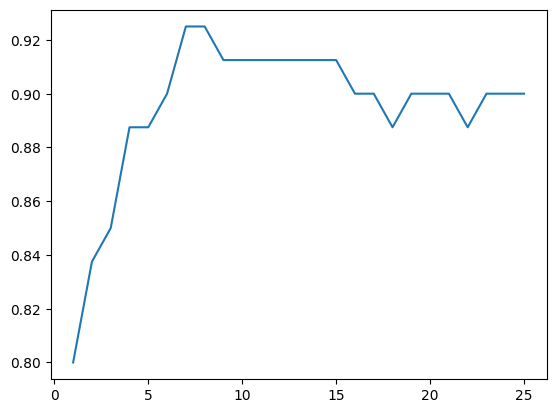

In [51]:
plt.plot(range(1,26),accuracy)

In [52]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [54]:
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.925

In [56]:
def predict_output():
  age = int(input("Enter the age :"))
  salary = int(input("Enter the salary :"))
  return np.array([[age],[salary]])

In [57]:
predict_output()

Enter the age :20
Enter the salary :200000


(2, 1)

In [62]:
def predict_output():
  age = int(input("Enter the age :"))
  salary = int(input("Enter the salary :"))

  X_new =  np.array([[age],[salary]]).reshape(1,2)
  X_new = scaler.transform(X_new)

  if knn.predict(X_new)[0] ==0:
    return "Will not purchase"
  else:
    return "will purchase"

In [63]:
predict_output()

Enter the age :45
Enter the salary :120000


'will purchase'

#1 . Decision Boundary of knn

1. what is decision boundary?

In a classification problem with two or more classes . a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two or more sets. one for each class .The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to other class.  

Important points

1.We can draw a decision boundary for all the classification algorithms including the nueralnetwork.
2. Decision boundary can be both linear(as in case of SVM) or non-linear(as in case of decision treee classifier or knn)
3. Decision boundaries are not always claer cut.That is the transition from one class in feature space to another is not discontinious,but gradual . This effect is common in fuzzy logic based classification algorithms,where membership in one class or other in ambiguous.
4. For higher dimension problems the decision boundary acts as a hyperplane(for linear ones)

2.Vornoi Diagram
In Mathematics a Voronoi diagram ia a partioning ofa plane into regions based on distance to points in a specific subset of the plane.

3. Steps to plot Decision Boundary of KNN(Assuming two input columns).
 1.Train the classifier on the training test.

 2.Create a Uniform grid(with the help of numpy Meshgrids) of points that densely covers the regions of input space containing the training set.
 3.Classify each point on the grid.Store the results in an arrayA,where Aij caontains the predicted class for the point at row i,column j on the grid.
 4.plot the array as an image ,where each pixel corresponds to the grid point and its color represents the predicted class.The decision bounday can be seen as contours where the image changes the color.

 5.Finally print out the training data with their respective color on the same contour.


In [64]:
# 1 Training the classifier on the training set that we have did previously only

step1. Training the classifier on the training set that we have did previously **only**

purpose of meshgrid

Meshgrid is very useful to evaluate the functions on the grid.We can apply any function to that points of a meshplot to plot a function

step2. Creating a meshgrid

In [75]:
a = np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b = np.arange(start = X_train[:,1].min()-1,stop = X_train[:,0].max()+1,step=0.01)
XX,YY = np.meshgrid(a,b)

In [76]:
XX.shape

(573, 604)

In [74]:
YY.shape

(573, 604)

In [77]:
573* 604

346092

Step 3: Classifying every point on the meshgrd

In [79]:
print(XX[0][0])
print(YY[0][0])
knn.predict(np.array([-2.875708350220804,-2.5623493620100066]).reshape(1,2))

-2.875708350220804
-2.5623493620100066


array([0])

In [86]:
#Example
m = np.array([[1,2,3],[4,5,6]])
n = np.array([[7,8,9],[0,0,0]])
z = np.array([m.ravel(),n.ravel()])
print(z)
print(z.shape)

[[1 2 3 4 5 6]
 [7 8 9 0 0 0]]
(2, 6)


In [91]:
#Example
m = np.array([[1,2,3],[4,5,6]])
n = np.array([[7,8,9],[0,0,0]])
z = np.array([m.ravel(),n.ravel()]).T
print(z)
print(z.shape)

[[1 7]
 [2 8]
 [3 9]
 [4 0]
 [5 0]
 [6 0]]
(6, 2)


In [92]:
np.array([XX.ravel(),YY.ravel()])

array([[-2.87570835, -2.86570835, -2.85570835, ...,  3.13429165,
         3.14429165,  3.15429165],
       [-2.56234936, -2.56234936, -2.56234936, ...,  3.15765064,
         3.15765064,  3.15765064]])

In [94]:
input_array = np.array([XX.ravel(),YY.ravel()]).T

In [97]:
labels = knn.predict(input_array)

In [98]:
labels.shape

(346092,)

Step 4 :Plotting the array as an image

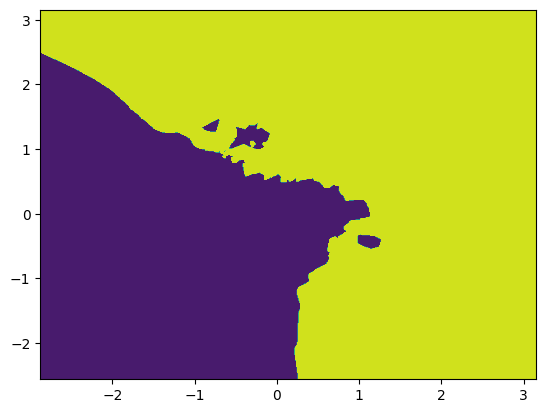

In [99]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

Step5 :Plotting all the training data on the plot

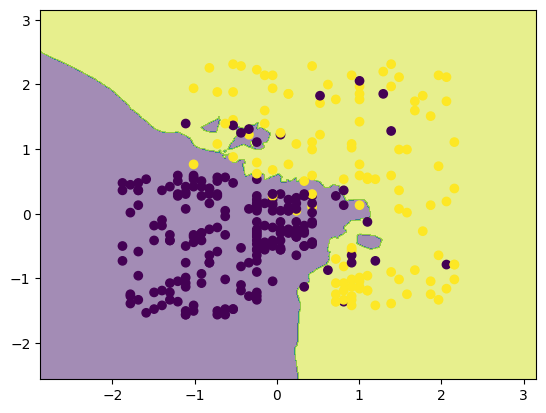

In [101]:
plt.contourf(XX,YY,labels.reshape(XX.shape),alpha = 0.5)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[49,  2],
       [ 4, 25]])

 Effect of K on training Error rate and Validation Error Rate


In [111]:
error_train = []
error_test = []
for i in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  x = confusion_matrix(y_train,knn.predict(X_train))
  y = confusion_matrix(y_test,knn.predict(X_test))
  error_train.append((x[0][1]+x[1][0])/x.sum())
  error_test.append((y[0][1]+y[1][0])/y.sum())


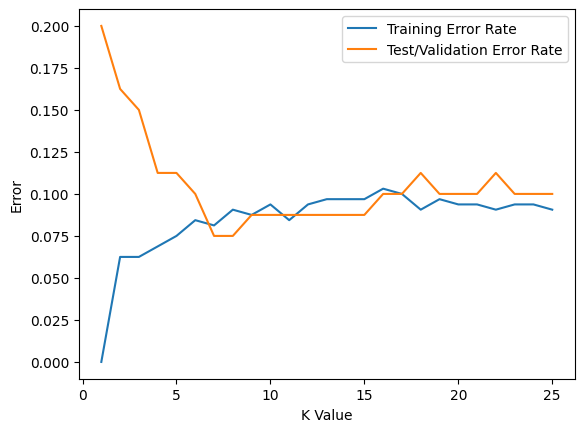

In [112]:
plt.plot(range(1,26),error_train,label='Training Error Rate')
plt.plot(range(1,26),error_test,label = 'Test/Validation Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

Conclusion

 1.For smaller values of k=1 the model generally overfits and shows High Varience.


 2.For higher values of k=n is the no of rows in training set the model underfits and shows High Bias.